In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import tensorflow as tf
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import cifar10
import warnings
warnings.filterwarnings('ignore')

print(f"TensorFlow version: {tf.__version__}")
print(f"NumPy version: {np.__version__}")

TensorFlow version: 2.20.0
NumPy version: 2.3.2


In [2]:
# Nguyễn Minh Vũ – B22DCVT594
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Định nghĩa tên các lớp
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training set shape: {x_train.shape}")
print(f"Test set shape: {x_test.shape}")
print(f"Image shape: {x_train[0].shape}")

# Sử dụng subset nhỏ để demo (1000 ảnh từ test set)
n_samples = 1000
x_subset = x_test[:n_samples]
y_subset = y_test[:n_samples]

print(f"\nSubset shape: {x_subset.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 55s 0us/step
Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Image shape: (32, 32, 3)

Subset shape: (1000, 32, 32, 3)


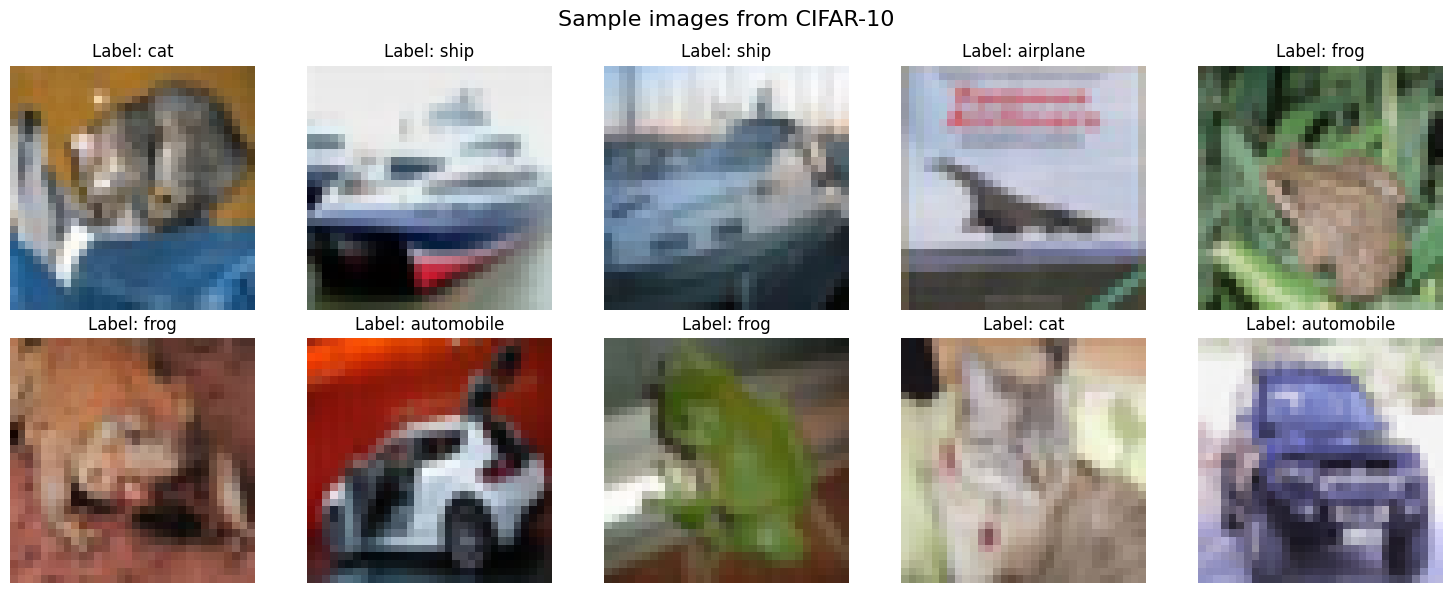

In [ ]:
# Nguyễn Minh Vũ – B22DCVT594ư
# Visualize một số ảnh mẫu
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_subset[i])
    ax.set_title(f"Label: {class_names[y_subset[i][0]]}")
    ax.axis('off')
plt.suptitle('Sample images from CIFAR-10', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Nguyễn Minh Vũ – B22DCVT594
# Load VGG16 pretrained trên ImageNet, không bao gồm fully connected layers
# include_top=False: Loại bỏ classification head
# pooling='avg': Thêm Global Average Pooling để có output vector 1D
base_model = VGG16(weights='imagenet', 
                   include_top=False, 
                   pooling='avg',
                   input_shape=(224, 224, 3))

print("Model Architecture:")
base_model.summary()
print(f"\nOutput shape: {base_model.output_shape}")
print(f"Feature dimension: {base_model.output_shape[1]}")

Model Architecture:


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)


Output shape: (None, 512)
Feature dimension: 512


In [ ]:
# Nguyễn Minh Vũ – B22DCVT594
def preprocess_images(images):
    """
    Tiền xử lý ảnh cho VGG16:
    1. Resize từ 32x32 lên 224x224
    2. Chuẩn hóa theo ImageNet preprocessing
    """
    processed = []
    for img in images:
        # Resize về 224x224
        img_resized = tf.image.resize(img, (224, 224))
        # Preprocess theo chuẩn VGG16
        img_preprocessed = vgg_preprocess(img_resized)
        processed.append(img_preprocessed)
    return np.array(processed)

def extract_features(images, model, batch_size=32):
    """
    Trích xuất features từ ảnh bằng CNN pretrained
    """
    features = []
    n_batches = int(np.ceil(len(images) / batch_size))
    
    print(f"Extracting features from {len(images)} images...")
    for i in range(n_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(images))
        batch = images[start_idx:end_idx]
        
        # Trích xuất features
        batch_features = model.predict(batch, verbose=0)
        features.append(batch_features)
        
        if (i + 1) % 10 == 0:
            print(f"  Processed {end_idx}/{len(images)} images")
    
    return np.vstack(features)

# Tiền xử lý ảnh
print("Step 1: Preprocessing images...")
x_processed = preprocess_images(x_subset)
print(f"Processed shape: {x_processed.shape}")

# Trích xuất features
print("\nStep 2: Extracting features using VGG16...")
features = extract_features(x_processed, base_model)
print(f"\nFeatures shape: {features.shape}")
print(f"Each image is represented by a {features.shape[1]}-dimensional vector")

Step 1: Preprocessing images...
Processed shape: (1000, 224, 224, 3)

Step 2: Extracting features using VGG16...
Extracting features from 1000 images...
Processed shape: (1000, 224, 224, 3)

Step 2: Extracting features using VGG16...
Extracting features from 1000 images...
  Processed 320/1000 images
  Processed 320/1000 images
  Processed 640/1000 images
  Processed 640/1000 images
  Processed 960/1000 images
  Processed 960/1000 images

Features shape: (1000, 512)
Each image is represented by a 512-dimensional vector

Features shape: (1000, 512)
Each image is represented by a 512-dimensional vector


In [ ]:
# Nguyễn Minh Vũ – B22DCVT594
# Chuẩn hóa features bằng StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

print(f"Original features - Mean: {features.mean():.4f}, Std: {features.std():.4f}")
print(f"Scaled features - Mean: {features_scaled.mean():.4f}, Std: {features_scaled.std():.4f}")
print(f"Scaled features shape: {features_scaled.shape}")

Original features - Mean: 1.2280, Std: 2.2972
Scaled features - Mean: 0.0000, Std: 1.0000
Scaled features shape: (1000, 512)


Computing inertia for different K values...
K=2: inertia=483112.31
K=3: inertia=467199.06
K=2: inertia=483112.31
K=3: inertia=467199.06
K=4: inertia=457350.22
K=4: inertia=457350.22
K=5: inertia=449021.16
K=5: inertia=449021.16
K=6: inertia=442336.19
K=6: inertia=442336.19
K=7: inertia=437841.16
K=7: inertia=437841.16
K=8: inertia=433816.16
K=8: inertia=433816.16
K=9: inertia=429151.97
K=9: inertia=429151.97
K=10: inertia=425869.72
K=10: inertia=425869.72
K=11: inertia=423010.50
K=11: inertia=423010.50
K=12: inertia=421338.59
K=12: inertia=421338.59
K=13: inertia=418022.78
K=13: inertia=418022.78
K=14: inertia=414384.12
K=14: inertia=414384.12


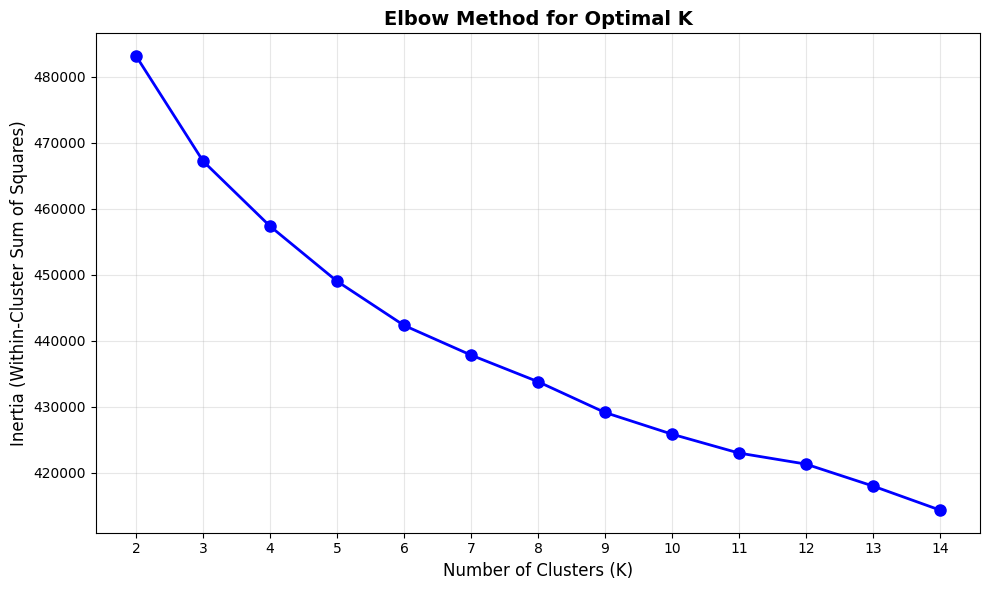


→ Chọn K tại vị trí 'khuỷu tay' (elbow) trên đồ thị


In [ ]:
# Nguyễn Minh Vũ – B22DCVT594
# Tính inertia cho các giá trị K khác nhau
inertias = []
K_range = range(2, 15)

print("Computing inertia for different K values...")
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_scaled)
    inertias.append(kmeans.inertia_)
    print(f"K={k}: inertia={kmeans.inertia_:.2f}")

# Vẽ Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (K)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method for Optimal K', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(K_range)
plt.tight_layout()
plt.show()

print("\n→ Chọn K tại vị trí 'khuỷu tay' (elbow) trên đồ thị")

In [ ]:
# Nguyễn Minh Vũ – B22DCVT594
# Chọn K=10 (tương ứng với 10 lớp trong CIFAR-10)
optimal_k = 10
print(f"Training K-Means with K={optimal_k}...")

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10, max_iter=300)
cluster_labels = kmeans.fit_predict(features_scaled)

print(f"\nClustering completed!")
print(f"Inertia: {kmeans.inertia_:.2f}")
print(f"Number of iterations: {kmeans.n_iter_}")

# Phân tích phân bố các cluster
unique, counts = np.unique(cluster_labels, return_counts=True)
print(f"\nCluster distribution:")
for cluster_id, count in zip(unique, counts):
    print(f"  Cluster {cluster_id}: {count} images ({count/len(cluster_labels)*100:.1f}%)")

Training K-Means with K=10...

Clustering completed!
Inertia: 425869.72
Number of iterations: 25

Cluster distribution:
  Cluster 0: 48 images (4.8%)
  Cluster 1: 233 images (23.3%)
  Cluster 2: 45 images (4.5%)
  Cluster 3: 58 images (5.8%)
  Cluster 4: 60 images (6.0%)
  Cluster 5: 165 images (16.5%)
  Cluster 6: 88 images (8.8%)
  Cluster 7: 37 images (3.7%)
  Cluster 8: 150 images (15.0%)
  Cluster 9: 116 images (11.6%)

Clustering completed!
Inertia: 425869.72
Number of iterations: 25

Cluster distribution:
  Cluster 0: 48 images (4.8%)
  Cluster 1: 233 images (23.3%)
  Cluster 2: 45 images (4.5%)
  Cluster 3: 58 images (5.8%)
  Cluster 4: 60 images (6.0%)
  Cluster 5: 165 images (16.5%)
  Cluster 6: 88 images (8.8%)
  Cluster 7: 37 images (3.7%)
  Cluster 8: 150 images (15.0%)
  Cluster 9: 116 images (11.6%)


Explained variance ratio: [0.08013636 0.05472865]
Total variance explained: 0.1349


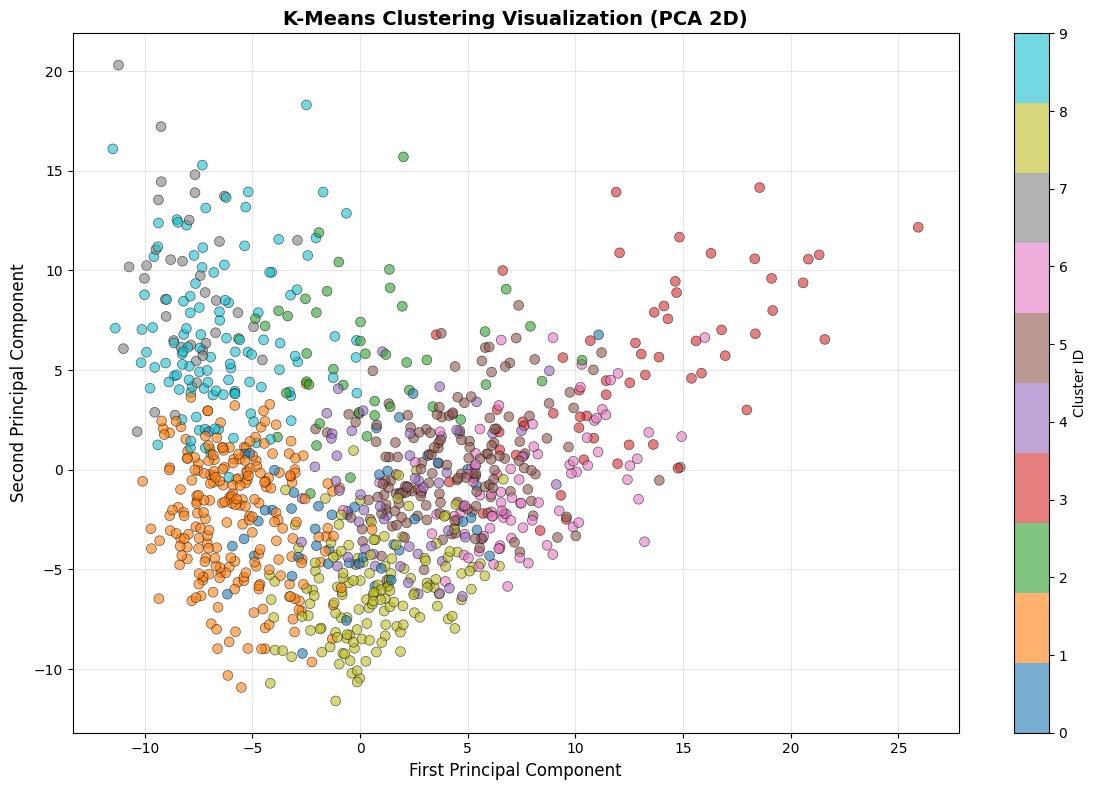

In [ ]:
# Nguyễn Minh Vũ – B22DCVT594
# Giảm chiều features xuống 2D bằng PCA để visualize
pca = PCA(n_components=2, random_state=42)
features_2d = pca.fit_transform(features_scaled)

print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total variance explained: {pca.explained_variance_ratio_.sum():.4f}")

# Visualize clusters trong không gian 2D
plt.figure(figsize=(12, 8))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], 
                     c=cluster_labels, cmap='tab10', 
                     alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Cluster ID')
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('K-Means Clustering Visualization (PCA 2D)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

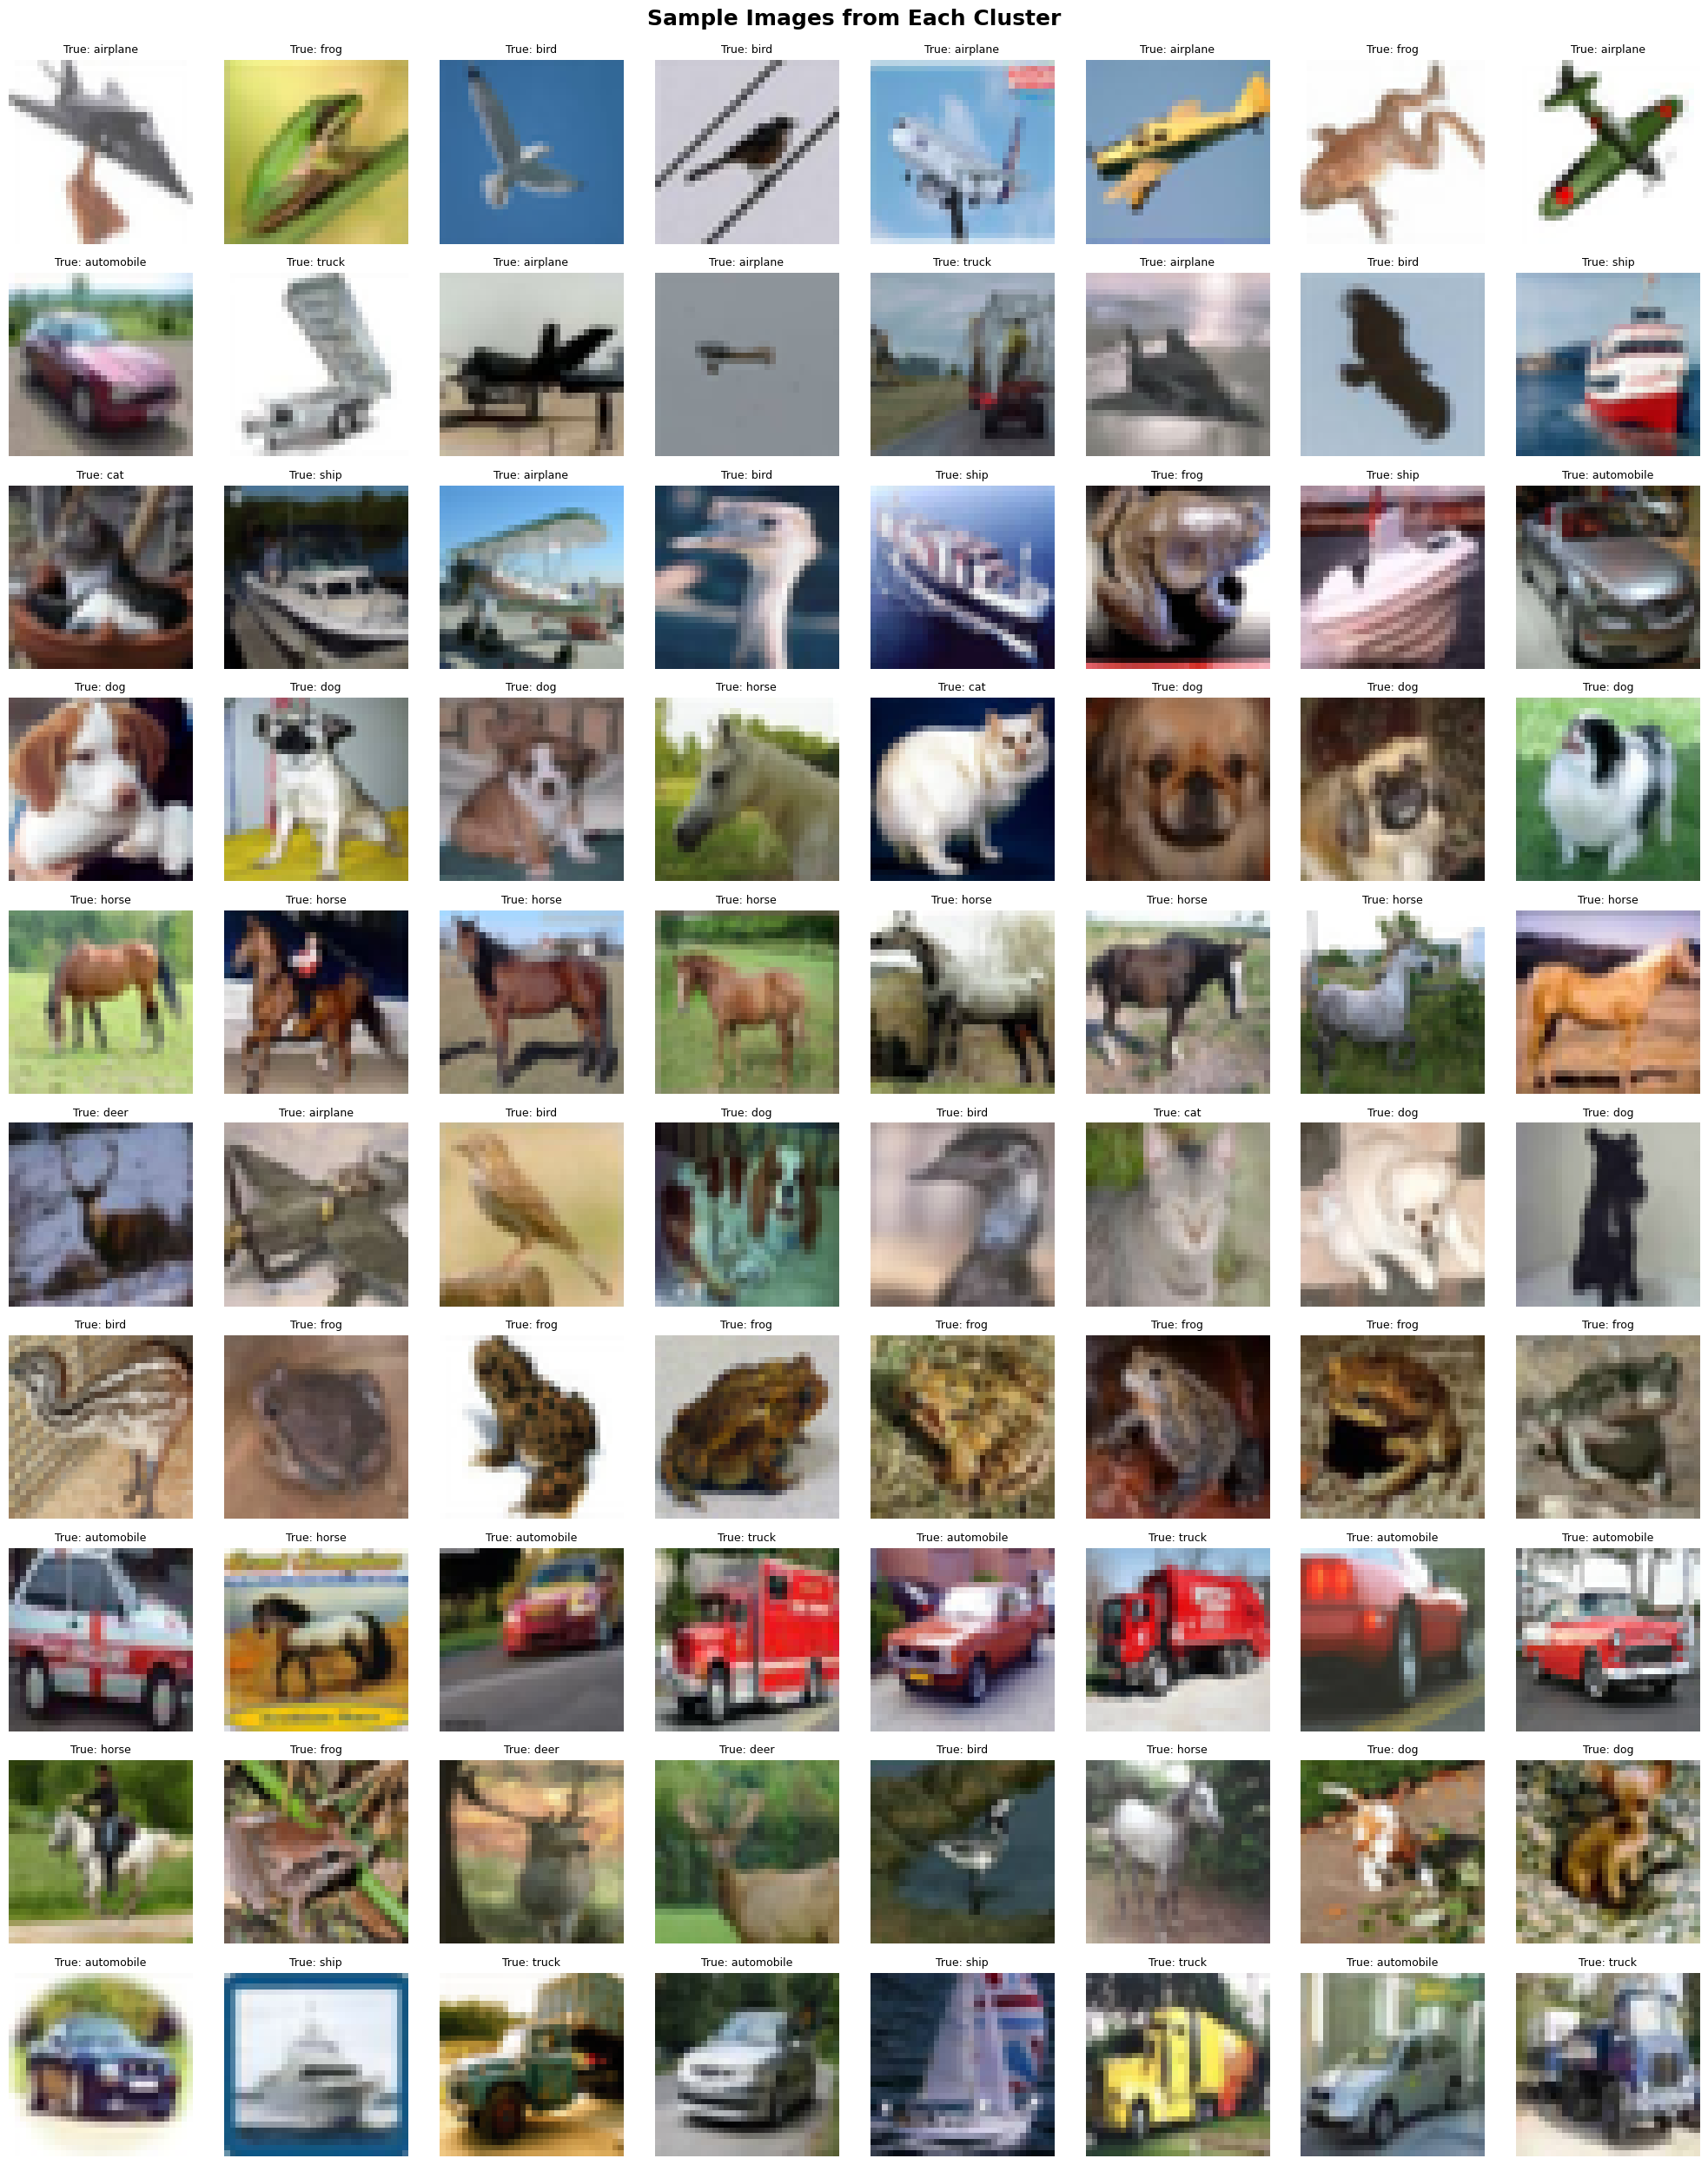

In [ ]:
# Nguyễn Minh Vũ – B22DCVT594
# Hiển thị 8 ảnh mẫu từ mỗi cluster
n_samples_per_cluster = 8

fig, axes = plt.subplots(optimal_k, n_samples_per_cluster, figsize=(20, 25))
fig.suptitle('Sample Images from Each Cluster', fontsize=18, fontweight='bold', y=0.995)

for cluster_id in range(optimal_k):
    # Lấy indices của các ảnh thuộc cluster này
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    
    # Random chọn n_samples_per_cluster ảnh
    if len(cluster_indices) >= n_samples_per_cluster:
        sample_indices = np.random.choice(cluster_indices, n_samples_per_cluster, replace=False)
    else:
        sample_indices = cluster_indices
    
    # Hiển thị ảnh
    for i, idx in enumerate(sample_indices):
        if i < n_samples_per_cluster:
            axes[cluster_id, i].imshow(x_subset[idx])
            axes[cluster_id, i].set_title(f'True: {class_names[y_subset[idx][0]]}', fontsize=9)
            axes[cluster_id, i].axis('off')
    
    # Đặt label cho hàng
    axes[cluster_id, 0].set_ylabel(f'Cluster {cluster_id}\n({len(cluster_indices)} imgs)', 
                                    fontsize=11, fontweight='bold', rotation=0, 
                                    labelpad=60, va='center')

plt.tight_layout()
plt.show()

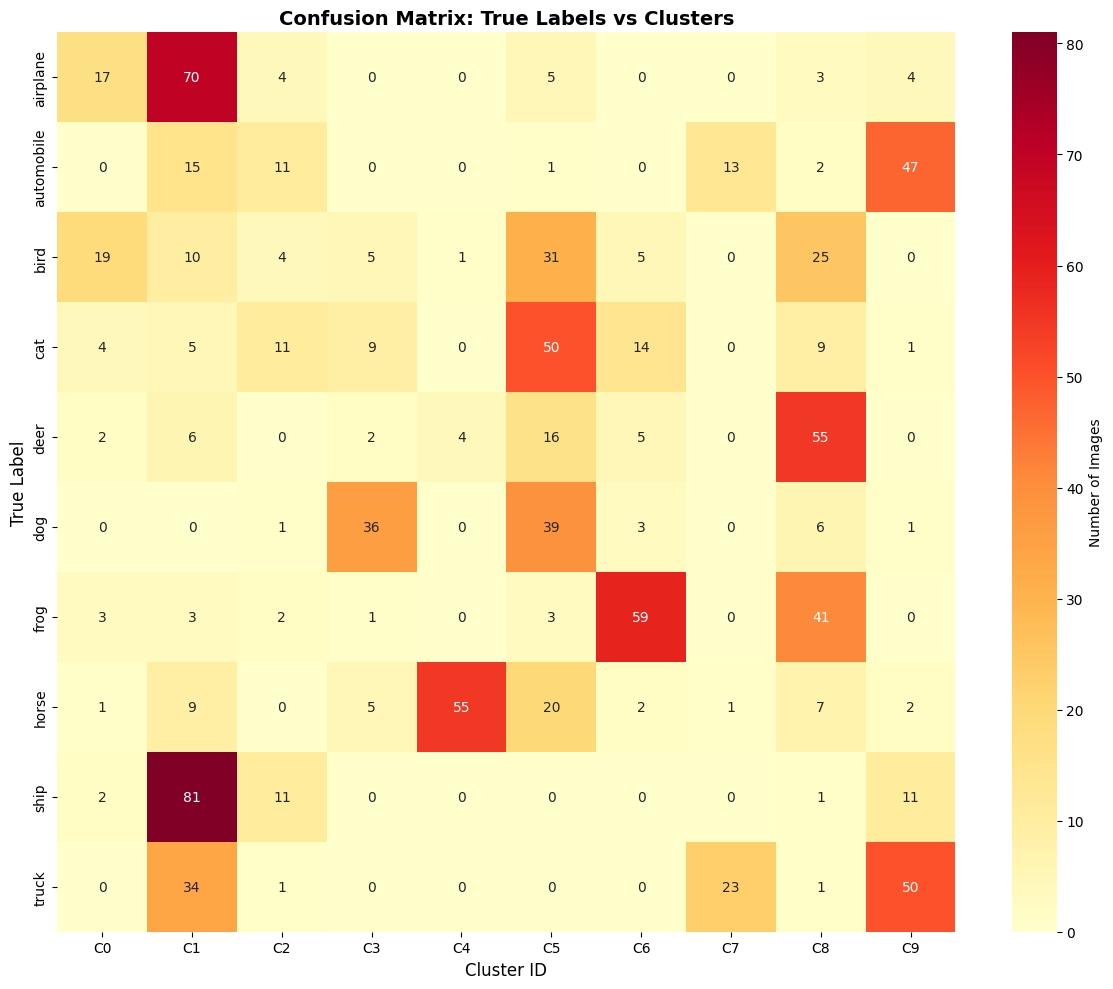


Cluster Composition Analysis:

Cluster 0 (48 images):
  - bird: 19 images (39.6%)
  - airplane: 17 images (35.4%)
  - cat: 4 images (8.3%)

Cluster 1 (233 images):
  - ship: 81 images (34.8%)
  - airplane: 70 images (30.0%)
  - truck: 34 images (14.6%)

Cluster 2 (45 images):
  - ship: 11 images (24.4%)
  - cat: 11 images (24.4%)
  - automobile: 11 images (24.4%)

Cluster 3 (58 images):
  - dog: 36 images (62.1%)
  - cat: 9 images (15.5%)
  - horse: 5 images (8.6%)

Cluster 4 (60 images):
  - horse: 55 images (91.7%)
  - deer: 4 images (6.7%)
  - bird: 1 images (1.7%)

Cluster 5 (165 images):
  - cat: 50 images (30.3%)
  - dog: 39 images (23.6%)
  - bird: 31 images (18.8%)

Cluster 6 (88 images):
  - frog: 59 images (67.0%)
  - cat: 14 images (15.9%)
  - deer: 5 images (5.7%)

Cluster 7 (37 images):
  - truck: 23 images (62.2%)
  - automobile: 13 images (35.1%)
  - horse: 1 images (2.7%)

Cluster 8 (150 images):
  - deer: 55 images (36.7%)
  - frog: 41 images (27.3%)
  - bird: 25 imag

In [ ]:
# Nguyễn Minh Vũ – B22DCVT594
# Tạo confusion matrix giữa clusters và true labels
from sklearn.metrics import confusion_matrix

confusion_mat = confusion_matrix(y_subset.flatten(), cluster_labels)

plt.figure(figsize=(12, 10))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='YlOrRd', 
            xticklabels=[f'C{i}' for i in range(optimal_k)],
            yticklabels=class_names,
            cbar_kws={'label': 'Number of Images'})
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix: True Labels vs Clusters', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Phân tích cluster composition
print("\nCluster Composition Analysis:")
print("=" * 80)
for cluster_id in range(optimal_k):
    cluster_indices = np.where(cluster_labels == cluster_id)[0]
    cluster_true_labels = y_subset[cluster_indices].flatten()
    
    # Đếm số lượng mỗi class trong cluster
    unique_labels, counts = np.unique(cluster_true_labels, return_counts=True)
    
    print(f"\nCluster {cluster_id} ({len(cluster_indices)} images):")
    sorted_idx = np.argsort(counts)[::-1]  # Sort descending
    for idx in sorted_idx[:3]:  # Top 3 classes
        label = unique_labels[idx]
        count = counts[idx]
        percentage = count / len(cluster_indices) * 100
        print(f"  - {class_names[label]}: {count} images ({percentage:.1f}%)")

Clustering Quality Metrics:
Silhouette Score: -0.0068
  → Range: [-1, 1], Higher is better
  → > 0.5: Good clustering
  → 0.2-0.5: Moderate clustering
  → < 0.2: Poor clustering

Calinski-Harabasz Score: 22.25
  → Higher is better
  → Measures ratio of between-cluster to within-cluster variance

Davies-Bouldin Score: 3.7810
  → Range: [0, ∞), Lower is better
  → Measures average similarity between clusters


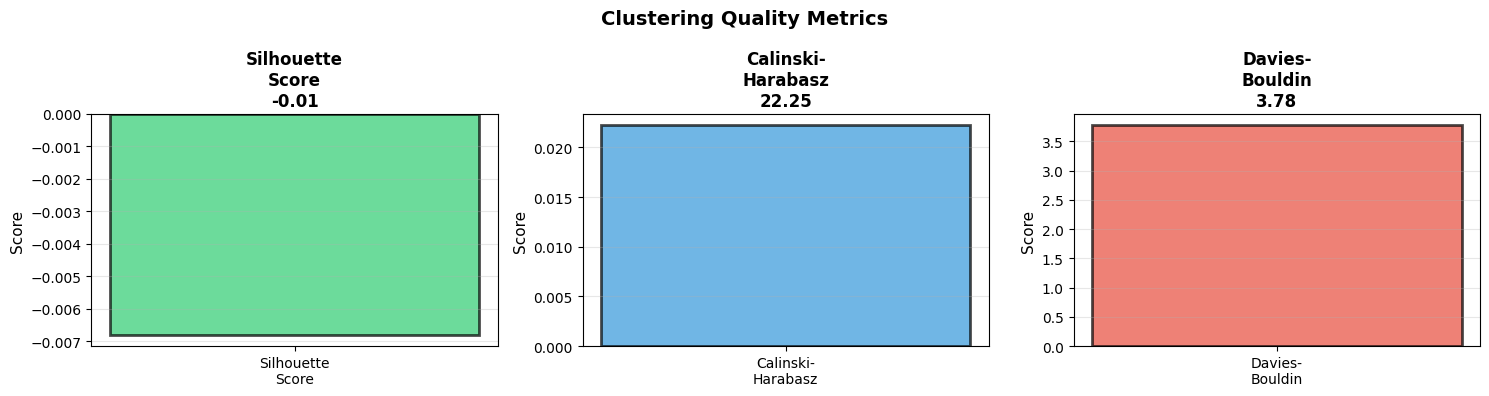

In [ ]:
# Nguyễn Minh Vũ – B22DCVT594
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Tính các metrics đánh giá clustering
silhouette = silhouette_score(features_scaled, cluster_labels)
calinski = calinski_harabasz_score(features_scaled, cluster_labels)
davies = davies_bouldin_score(features_scaled, cluster_labels)

print("Clustering Quality Metrics:")
print("=" * 60)
print(f"Silhouette Score: {silhouette:.4f}")
print("  → Range: [-1, 1], Higher is better")
print("  → > 0.5: Good clustering")
print("  → 0.2-0.5: Moderate clustering")
print("  → < 0.2: Poor clustering\n")

print(f"Calinski-Harabasz Score: {calinski:.2f}")
print("  → Higher is better")
print("  → Measures ratio of between-cluster to within-cluster variance\n")

print(f"Davies-Bouldin Score: {davies:.4f}")
print("  → Range: [0, ∞), Lower is better")
print("  → Measures average similarity between clusters")

# Visualization metrics
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

metrics = ['Silhouette\nScore', 'Calinski-\nHarabasz', 'Davies-\nBouldin']
values = [silhouette, calinski/1000, davies]  # Scale CH for visualization
colors = ['#2ecc71', '#3498db', '#e74c3c']

for i, (metric, value, color) in enumerate(zip(metrics, values, colors)):
    axes[i].bar([metric], [value], color=color, alpha=0.7, edgecolor='black', linewidth=2)
    axes[i].set_ylabel('Score', fontsize=11)
    axes[i].set_title(f'{metric}\n{[silhouette, calinski, davies][i]:.2f}', 
                     fontsize=12, fontweight='bold')
    axes[i].grid(True, alpha=0.3, axis='y')

plt.suptitle('Clustering Quality Metrics', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()